In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import h5py 
import datetime
import glob
import copy
from calendar import monthrange
from cartopy.io.shapereader import Reader
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

import sys
sys.path.append('d:\\gitCCA\\cca-jupyter\\py\\')
import mapper_functions as mpf

In [2]:
### BEGIN: rango del mapa
#latmin = 18.3
#latmax = 20.5
#lonmin = -100.5
#lonmax = -97.7
latmin = 19.1
latmax = 19.8
lonmin = -99.5
lonmax = -98.7
#latmin = 20
#latmax = 21
#lonmin = -104
#lonmax = -103
### END: rango del mapa

### BEGIN: parametros para funciones del modulo mapper_functions
nx=50
ny=50
footprintradio = 5.0/110.0
pathname = 'd:\\CCA\\NASAGESDISC\\OCO3L2Lite\\mexico3\\mexico_oco3_lite_2020*.h5'
targetname1 = 'fossil0036'
targetname2 = 'volcano0002'
name = '/xco2'
psurf = '/Retrieval/psurf'
psurfmatname = 'Psurf_50x50_5km_SmallGrid.npz'
dsetpath = 'd:\\gitCCA\\cca-jupyter\\altzrefavgoff.npz'
daylistpath = 'd:\\gitCCA\\cca-jupyter\\alldatadays.npz'
### END: parametros para funciones del modulo

### BEGIN: parametros para mappernxm 
### NOTA: Las matrices, titulos, y niveles se definen por el usuario justo antes de cambiar la funcion
fontsize = 20
ticksize = 14
rows = 3
cols = 1
figname = 'd:\\gitCCA\\cca-jupyter\\figures\\3x3\\xCO2_ML_PsurfComp_B2_Small.png'
savefig = 0 # 0 for no 1 for yes
cbarname = 'ppm'
### END: parametros para mappernxm

### BEGIN: verbosity and testing, 0=no, 1=yes
testwithdset = 0
verbcompile = 1
verbdata = 1
verbmatrix = 1
### END: verbosity and testing

### BEGIN: legacy variables
#paltz = 748.2134 #extended
#paltz = #no hay paltz en la matriz de psurf para el rango pequenyo
#xco2altz = 412.4
#psurfaltz = 633.72
### END: legacy variables


In [3]:
to=datetime.datetime.utcfromtimestamp(0.0)

lats=latmin+(latmax-latmin)*np.arange(ny)/(ny-1)
lons=lonmin+(lonmax-lonmin)*np.arange(nx)/(nx-1)


lista=glob.glob(pathname)
#print(lista)

#data = mpf.compilealldata(lats,lons,lista,footprintradio,verbcompile)
data = mpf.compilealldatat(lats,lons,lista,footprintradio,verbcompile)
#data = mpf.compilealldatatarget(lats,lons,lista,footprintradio,targetname1,targetname2,verbcompile)
#data = mpf.compilealldatatargett(lats,lons,lista,footprintradio,targetname1,targetname2,verbcompile)

print(data.shape)


Data shape for current loop is:  (77,)
Data shape for current loop is:  (133,)
Data shape for current loop is:  (237,)
Data shape for current loop is:  (475,)
Data shape for current loop is:  (967,)
Data shape for current loop is:  (1257,)
Data shape for current loop is:  (1706,)
Data shape for current loop is:  (1984,)
Data shape for current loop is:  (2318,)
Data shape for current loop is:  (2552,)
Data shape for current loop is:  (2554,)
Data shape for current loop is:  (2559,)
Data shape for current loop is:  (2648,)
Data shape for current loop is:  (2696,)
Data shape for current loop is:  (2795,)
Data shape for current loop is:  (2898,)
Data shape for current loop is:  (2920,)
Data shape for current loop is:  (2942,)
Data shape for current loop is:  (3133,)
Data shape for current loop is:  (3355,)
Data shape for current loop is:  (3409,)
Data shape for current loop is:  (3523,)
Data shape for current loop is:  (3552,)
Data shape for current loop is:  (3594,)
(3594,)


In [4]:
daylist = np.load(daylistpath,'r')
dset = np.load(dsetpath,'r')
mset = np.load(psurfmatname,'r')
psurfmat = mset['matrix']
datos = mpf.datacorrection3_ml(daylist,dset,data,name,psurf,verbdata)
datac = mpf.matrixcorrection3_ml(daylist,dset,data,psurfmat,name,psurf,lats,lons,verbmatrix)

Datos seleccionados:
[412.91821289 412.6987915  412.57522583 ... 412.38046265 413.08029175
 412.85778809]
1590254646.6761427 [1.07906997e+08 1.07906997e+08 1.07906998e+08 ... 1.37621985e+08
 1.37621985e+08 1.37621985e+08]
original data
(3594,)
[412.91821289 412.6987915  412.57522583 ... 412.38046265 413.08029175
 412.85778809]
corrected
(3594,)
[426.53349336 425.4451092  423.85332698 ... 413.56366319 417.5954609
 416.40936466]
Datos seleccionados:
[412.91821289 412.6987915  412.57522583 ... 412.38046265 413.08029175
 412.85778809]
1590254646.6761427 [1.07906997e+08 1.07906997e+08 1.07906998e+08 ... 1.37621985e+08
 1.37621985e+08 1.37621985e+08]
-99.34017944335938 19.765535354614258
-99.35306122448979 19.757142857142856
735.4887084960938 410.2160830584148
x: 430.8666716992804 datacorr copy:  430.8666716992804 original data: 412.918212890625
-99.3279037475586 19.774951934814453
-99.33673469387755 19.771428571428572
709.2071533203125 410.2160830650631
x: 435.38512584149345 datacorr copy: 

756.2569580078125 410.92800765777883
x: 439.6844814315374 datacorr copy:  439.6844814315374 original data: 415.3771667480469
-99.17618560791016 19.30754280090332
-99.18979591836735 19.3
752.0799560546875 410.92800770511474
x: 432.17076859100723 datacorr copy:  432.17076859100723 original data: 414.11492919921875
-99.15288543701172 19.310211181640625
-99.15714285714286 19.3
759.0999755859375 410.9280077623559
x: 440.0196281548767 datacorr copy:  440.0196281548767 original data: 415.5211181640625
-99.16243743896484 19.32370948791504
-99.1734693877551 19.314285714285717
763.8555908203125 410.9280077674139
x: 425.22324227788636 datacorr copy:  425.22324227788636 original data: 413.25994873046875
-99.11966705322266 19.29885482788086
-99.12448979591836 19.28571428571429
756.7164306640625 410.928007814554
x: 431.5379095656968 datacorr copy:  431.5379095656968 original data: 414.1273193359375
-99.12946319580078 19.312726974487305
-99.14081632653061 19.3
763.335693359375 410.92800781960455
x: 4

x: 431.2522606681579 datacorr copy:  431.2522606681579 original data: 414.587890625
-98.88850402832031 19.536495208740234
-98.89591836734694 19.52857142857143
778.8697509765625 410.9280042752034
x: 426.44052938802656 datacorr copy:  426.44052938802656 original data: 413.7087707519531
-98.89545440673828 19.552736282348633
-98.89591836734694 19.542857142857144
777.9041137695312 410.92800428025396
x: 423.4866964145434 datacorr copy:  423.4866964145434 original data: 413.1664733886719
-98.90239715576172 19.56894302368164
-98.91224489795918 19.557142857142857
780.0112915039062 410.92800428530444
x: 430.05227279743724 datacorr copy:  430.05227279743724 original data: 414.3791809082031
-98.84771728515625 19.487335205078125
-98.86326530612246 19.485714285714288
781.61962890625 410.9280043174815
x: 430.23007269901973 datacorr copy:  430.23007269901973 original data: 414.4438171386719
-98.85429382324219 19.503786087036133
-98.86326530612246 19.5
780.9178466796875 410.92800432253193
x: 430.084200

-99.10967254638672 19.47072410583496
-99.12448979591836 19.45714285714286
782.5037841796875 411.74927346631875
x: 448.5146535199482 datacorr copy:  448.5146535199482 original data: 418.4799499511719
-99.1194076538086 19.483291625976562
-99.12448979591836 19.47142857142857
782.553955078125 411.7492734755962
x: 438.49511944661873 datacorr copy:  438.49511944661873 original data: 416.6470642089844
-99.1387710571289 19.50823974609375
-99.14081632653061 19.5
782.7242431640625 411.74927349412366
x: 436.0226358674673 datacorr copy:  436.0226358674673 original data: 416.1986083984375
-99.15838623046875 19.53323745727539
-99.1734693877551 19.52857142857143
781.8577880859375 411.749273512651
x: 433.8327984496355 datacorr copy:  433.8327984496355 original data: 415.7772216796875
-99.07244873046875 19.490509033203125
-99.07551020408164 19.485714285714288
782.5308837890625 411.7492736855957
x: 441.9085840909945 datacorr copy:  441.9085840909945 original data: 417.27142333984375
-99.05875396728516 1

-99.10816326530612 19.400000000000002
781.7828979492188 411.87388465352046
x: 429.04518020680894 datacorr copy:  429.04518020680894 original data: 415.0045166015625
-99.1176528930664 19.41265106201172
-99.12448979591836 19.400000000000002
781.336181640625 411.873884664048
x: 426.02716550431165 datacorr copy:  426.02716550431165 original data: 414.4476623535156
-99.1346206665039 19.416736602783203
-99.14081632653061 19.414285714285715
781.9723510742188 411.87388467457544
x: 423.04812451157295 datacorr copy:  423.04812451157295 original data: 413.9133605957031
-99.15138244628906 19.42072105407715
-99.15714285714286 19.414285714285715
781.74853515625 411.8738846851029
x: 430.3465713769505 datacorr copy:  430.3465713769505 original data: 415.2411193847656
-99.16792297363281 19.42472267150879
-99.1734693877551 19.414285714285715
781.74853515625 411.87388469563047
x: 426.41974062198074 datacorr copy:  426.41974062198074 original data: 414.52532958984375
-99.18473815917969 19.42867660522461
-

775.22900390625 411.74927474282816
x: 435.6933738868027 datacorr copy:  435.6933738868027 original data: 415.9491882324219
-98.99781799316406 19.699705123901367
-99.01020408163265 19.685714285714287
772.1317138671875 411.74927476135554
x: 435.5668067258369 datacorr copy:  435.5668067258369 original data: 415.84820556640625
-98.93549346923828 19.653156280517578
-98.94489795918368 19.642857142857142
778.244140625 411.7492748296389
x: 437.4517134204799 datacorr copy:  437.4517134204799 original data: 416.3397216796875
-98.96467590332031 19.690921783447266
-98.97755102040817 19.685714285714287
773.9476318359375 411.74927485742995
x: 436.070048999651 datacorr copy:  436.070048999651 original data: 415.9820556640625
-98.99393463134766 19.728498458862305
-99.01020408163265 19.714285714285715
762.67529296875 411.7492748852209
x: 440.5805583704955 datacorr copy:  440.5805583704955 original data: 416.41510009765625
-98.89828491210938 19.6729793548584
-98.91224489795918 19.67142857142857
768.3850

x: 422.47388013420914 datacorr copy:  422.47388013420914 original data: 413.9142761230469
-99.03700256347656 19.294450759887695
-99.04285714285714 19.28571428571429
759.9071044921875 412.3418938846424
x: 418.5557468625054 datacorr copy:  418.5557468625054 original data: 413.3285217285156
-99.04814147949219 19.33060646057129
-99.05918367346939 19.32857142857143
775.29931640625 412.34189391286327
x: 416.65985959870955 datacorr copy:  416.65985959870955 original data: 413.099609375
-99.05374908447266 19.348751068115234
-99.05918367346939 19.342857142857145
778.73779296875 412.341893926963
x: 420.58851002238185 datacorr copy:  420.58851002238185 original data: 413.81903076171875
-99.05949401855469 19.366952896118164
-99.07551020408164 19.357142857142858
779.1961669921875 412.34189394106295
x: 422.20484346106883 datacorr copy:  422.20484346106883 original data: 414.1133117675781
-99.01165771484375 19.274030685424805
-99.0265306122449 19.271428571428572
757.3164672851562 412.3418940303691
x:

x: 438.9398078080043 datacorr copy:  438.9398078080043 original data: 414.33953857421875
-99.17736053466797 19.7978458404541
-99.18979591836735 19.785714285714285
672.0939331054688 412.341921447918
x: 425.2425666211391 datacorr copy:  425.2425666211391 original data: 412.97235107421875
-99.07009887695312 19.776203155517578
-99.07551020408164 19.771428571428572
689.207275390625 412.3419215377504
x: 446.8557188909725 datacorr copy:  446.8557188909725 original data: 414.8436584472656
-99.10147857666016 19.789016723632812
-99.10816326530612 19.785714285714285
668.3932495117188 412.34192156597146
x: 458.1273792813477 datacorr copy:  458.1273792813477 original data: 414.3382568359375
-99.04068756103516 19.785852432250977
-99.04285714285714 19.785714285714285
705.2493896484375 412.34192169757864
x: 429.65331923759567 datacorr copy:  429.65331923759567 original data: 413.96197509765625
-99.05633544921875 19.79237937927246
-99.05918367346939 19.785714285714285
701.099853515625 412.3419217116786

x: 421.0848853081981 datacorr copy:  421.0848853081981 original data: 413.18341064453125
-98.89502716064453 19.125896453857422
-98.89591836734694 19.114285714285717
710.3853149414062 412.34188306238235
x: 417.9153980033414 datacorr copy:  417.9153980033414 original data: 412.8999938964844
-98.89275360107422 19.195972442626953
-98.89591836734694 19.185714285714287
743.4253540039062 412.3418831046818
x: 414.35597119139226 datacorr copy:  414.35597119139226 original data: 412.6241149902344
-98.89244842529297 19.219284057617188
-98.89591836734694 19.214285714285715
752.3864135742188 412.3418831187815
x: 414.06861522148205 datacorr copy:  414.06861522148205 original data: 412.6015319824219
-98.89249420166016 19.242473602294922
-98.89591836734694 19.22857142857143
758.7991943359375 412.34188313290235
x: 412.5139225982376 datacorr copy:  412.5139225982376 original data: 412.3689880371094
-98.8926010131836 19.265827178955078
-98.89591836734694 19.25714285714286
764.9662475585938 412.3418831470

-98.85245513916016 19.183679580688477
-98.86326530612246 19.171428571428574
746.277587890625 413.186035888954
x: 414.9021960075645 datacorr copy:  414.9021960075645 original data: 413.4321594238281
-98.9794692993164 19.761823654174805
-98.9938775510204 19.757142857142856
742.4195556640625 413.18604773876115
x: 418.804185436786 datacorr copy:  418.804185436786 original data: 413.9667663574219
-98.9707260131836 19.774703979492188
-98.97755102040817 19.771428571428572
733.1083984375 413.1860477544321
x: 403.29278839528956 datacorr copy:  403.29278839528956 original data: 411.91943359375
-98.94313049316406 19.7421932220459
-98.94489795918368 19.728571428571428
758.2587280273438 413.1860481415991
x: 407.8693550601417 datacorr copy:  407.8693550601417 original data: 412.3515930175781
-98.9466781616211 19.70037269592285
-98.96122448979592 19.7
767.323486328125 413.186048303561
x: 418.86202981911555 datacorr copy:  418.86202981911555 original data: 414.1334228515625
-98.92057037353516 19.73888

x: 424.25258100870525 datacorr copy:  424.25258100870525 original data: 415.03564453125
-99.41458892822266 19.615983963012695
-99.41836734693878 19.614285714285714
753.30322265625 413.562944267734
x: 421.69532258570985 datacorr copy:  421.69532258570985 original data: 414.7942199707031
-99.37548065185547 19.621463775634766
-99.38571428571429 19.614285714285714
767.6268920898438 413.562944295704
x: 418.5830278512426 datacorr copy:  418.5830278512426 original data: 414.4024963378906
-99.35588073730469 19.62456703186035
-99.36938775510204 19.614285714285714
775.4500122070312 413.562944309689
x: 416.347898172724 datacorr copy:  416.347898172724 original data: 414.0520935058594
-99.40071105957031 19.599720001220703
-99.40204081632653 19.585714285714285
756.613037109375 413.5629444407441
x: 411.5289360389084 datacorr copy:  411.5289360389084 original data: 413.2474365234375
-99.36161804199219 19.60542106628418
-99.36938775510204 19.6
772.4168701171875 413.562944468735
x: 417.2804755396862 da

762.2678833007812 413.3798316453634
x: 407.1332602874268 datacorr copy:  407.1332602874268 original data: 412.3717346191406
-98.77948760986328 19.793516159057617
-98.78163265306122 19.785714285714285
763.8223266601562 413.37983184587296
x: 402.5017202740612 datacorr copy:  402.5017202740612 original data: 411.605712890625
-98.78334045410156 19.68949317932129
-98.79795918367347 19.685714285714287
768.630615234375 413.3798319561443
x: 387.12839399463246 datacorr copy:  387.12839399463246 original data: 408.9610290527344
-98.77249145507812 19.742055892944336
-98.78163265306122 19.728571428571428
764.4357299804688 413.3798320012745
x: 409.3180211883851 datacorr copy:  409.3180211883851 original data: 412.71466064453125
-98.76905059814453 19.759384155273438
-98.78163265306122 19.757142857142856
766.639404296875 413.3798320163107
x: 408.2808962922892 datacorr copy:  408.2808962922892 original data: 412.5325622558594
-98.76611328125 19.690637588500977
-98.78163265306122 19.685714285714287
763

-98.92857142857143 19.22857142857143
757.076904296875 413.1020307367064
x: 405.14598825576076 datacorr copy:  405.14598825576076 original data: 411.8638000488281
-98.89098358154297 19.253931045532227
-98.89591836734694 19.242857142857144
763.7904052734375 413.10203070214226
x: 401.89611143164024 datacorr copy:  401.89611143164024 original data: 411.27484130859375
-98.9168930053711 19.212202072143555
-98.92857142857143 19.200000000000003
749.791259765625 413.10203054095433
x: 405.8522718863162 datacorr copy:  405.8522718863162 original data: 412.033203125
-98.90354919433594 19.22076988220215
-98.91224489795918 19.214285714285715
754.3519897460938 413.10203052368496
x: 403.9333251818059 datacorr copy:  403.9333251818059 original data: 411.7030334472656
-98.85111236572266 19.254613876342773
-98.86326530612246 19.242857142857144
764.5452880859375 413.1020304545823
x: 389.16381611607795 datacorr copy:  389.16381611607795 original data: 409.1789855957031
-98.9033203125 19.195907592773438
-98

x: 403.95764337431217 datacorr copy:  403.95764337431217 original data: 408.446533203125
-99.04156494140625 19.54938507080078
-99.04285714285714 19.542857142857144
782.5734252929688 409.4528307047125
x: 399.8549441144673 datacorr copy:  399.8549441144673 original data: 407.6950378417969
-99.05856323242188 19.554485321044922
-99.05918367346939 19.542857142857144
782.5621337890625 409.45283070630103
x: 408.1929535199671 datacorr copy:  408.1929535199671 original data: 409.22210693359375
-99.04464721679688 19.570556640625
-99.05918367346939 19.557142857142857
782.5369873046875 409.4528307259534
x: 399.9279501809341 datacorr copy:  399.9279501809341 original data: 407.7087707519531
-99.03070068359375 19.586668014526367
-99.04285714285714 19.585714285714285
782.4673461914062 409.45283074554897
x: 402.10619683380327 datacorr copy:  402.10619683380327 original data: 408.108154296875
-99.0031509399414 19.618858337402344
-99.01020408163265 19.614285714285714
781.7203979492188 409.4528307847993


x: 399.41654382145424 datacorr copy:  399.41654382145424 original data: 408.29193115234375
-99.07228088378906 19.283952713012695
-99.07551020408164 19.271428571428572
756.209716796875 410.09017506202025
x: 407.1176809181323 datacorr copy:  407.1176809181323 original data: 409.63043212890625
-99.05284881591797 19.287137985229492
-99.05918367346939 19.28571428571429
760.001708984375 410.09017507535333
x: 400.9019000856606 datacorr copy:  400.9019000856606 original data: 408.63031005859375
-99.03905487060547 19.27098846435547
-99.04285714285714 19.25714285714286
745.6127319335938 410.09017523982266
x: 398.06449654575175 datacorr copy:  398.06449654575175 original data: 408.37469482421875
-99.0198745727539 19.274099349975586
-99.0265306122449 19.271428571428572
757.3164672851562 410.09017525315573
x: 400.35068048274786 datacorr copy:  400.35068048274786 original data: 408.57177734375
-99.0060806274414 19.257976531982422
-99.01020408163265 19.25714285714286
749.4283447265625 410.09017541762

x: 414.5837808680144 datacorr copy:  414.5837808680144 original data: 411.97552490234375
-99.02713775634766 19.2081241607666
-99.04285714285714 19.200000000000003
719.0043334960938 411.70005054617803
x: 423.6455561451496 datacorr copy:  423.6455561451496 original data: 413.02508544921875
-99.0361557006836 19.221986770629883
-99.04285714285714 19.214285714285715
725.583740234375 411.7000505591535
x: 413.6815653727736 datacorr copy:  413.6815653727736 original data: 411.9358215332031
-99.00802612304688 19.254467010498047
-99.01020408163265 19.242857142857144
746.6699829101562 411.7000508792499
x: 413.0851762620765 datacorr copy:  413.0851762620765 original data: 411.8993225097656
-99.15899658203125 19.194673538208008
-99.1734693877551 19.185714285714287
707.65576171875 411.70006415113085
x: 422.31190072911943 datacorr copy:  422.31190072911943 original data: 412.7258605957031
-99.17391204833984 19.201454162597656
-99.18979591836735 19.200000000000003
711.2520141601562 411.70006416410627


x: 424.28375568630537 datacorr copy:  424.28375568630537 original data: 414.3279724121094
-98.8104248046875 19.550535202026367
-98.81428571428572 19.542857142857144
779.2314453125 412.1353026086152
x: 427.5923783969363 datacorr copy:  427.5923783969363 original data: 414.9120178222656
-98.7900390625 19.549671173095703
-98.79795918367347 19.542857142857144
780.3955078125 412.13530272277563
x: 426.7033641275108 datacorr copy:  426.7033641275108 original data: 414.7701416015625
-98.79693603515625 19.56664276123047
-98.79795918367347 19.557142857142857
779.3388671875 412.13530273284675
x: 429.0812549796129 datacorr copy:  429.0812549796129 original data: 415.181396484375
-98.80381774902344 19.583921432495117
-98.81428571428572 19.571428571428573
776.5975341796875 412.135302742918
x: 416.47424378695666 datacorr copy:  416.47424378695666 original data: 412.9026794433594
-98.7699203491211 19.598861694335938
-98.78163265306122 19.585714285714285
777.038330078125 412.13530298167024
x: 420.12940

1590254646.6761427 [1.07906997e+08 1.07906997e+08 1.07906998e+08 ... 1.37621985e+08
 1.37621985e+08 1.37621985e+08]
(3594,)


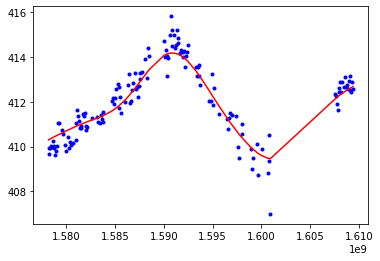

In [6]:
#### BEGIN 
#### yFIT test only
y = mpf.yfitdata(data)
x=data['tepoch']
print(y.shape)
ax0=plt.subplot(1,1,1)
ax0.plot(dset['tepoch'],dset['xco2avg'],'b.')
#ax0.plot(x,y,'k-')
ax0.plot(dset['tepoch'],dset['yfitavg'],'r-')
plt.show()
#### END 

In [ ]:
if testwithdset == 1:
    tmintest=(datetime.datetime(2020,4,10,0,0,0)-to).total_seconds()
    tmaxtest=(datetime.datetime(2020,4,12,0,0,0)-to).total_seconds()
    masktest = (tmintest <= data['tepoch']) & (tmaxtest >= data['tepoch'])
    datarowminus1 = 14
    print(dset['xCO2altz'][datarowminus1],dset['psurfaltz'][datarowminus1])
    datatest = copy.copy(data[masktest])
    datatest[name] = (datatest[name]*datatest[psurf] - dset['xCO2altz'][datarowminus1]*dset['psurfaltz'][datarowminus1])/(datatest[psurf]-dset['psurfaltz'][datarowminus1])
    print(datatest[name].shape)
    print(datos[name][masktest].shape)
    np.array_equal(datatest[name],datos[name][masktest])

In [31]:
datemin = datetime.datetime(2020,1,1,0,0,0)
datemax = datetime.datetime(2020,12,31,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()

matrix1,stdmat1,errmat1=mpf.matrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
matrix2,stdmat2,errmat2=mpf.matrixforinterval(tmin,tmax,datos,lats,lons,name,footprintradio)
matrixc,stdmatc,errmatc=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)
mdiff = matrix2 - matrixc
stddiff = stdmat2 - stdmatc
errdiff = errmat2 - errmatc
#np.save('matrixDelta0605',matrix)

d:\gitCCA\cca-jupyter\py\mapper_functions.py:634: RuntimeWarning: invalid value encountered in true_divide
  errmatrix=stdmatrix/np.sqrt(countermatrix)


In [44]:
datemin = datetime.datetime(2020,1,1,0,0,0)
datemax = datetime.datetime(2020,4,30,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()
tmt0 = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
matrixc,stdmatc,errmatc=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)
datemin = datetime.datetime(2020,5,1,0,0,0)
datemax = datetime.datetime(2020,8,31,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()
tmt1 = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
matrixc1,stdmatc1,errmatc1=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)
datemin = datetime.datetime(2020,9,1,0,0,0)
datemax = datetime.datetime(2020,12,31,23,59,59)
tmin=(datemin-to).total_seconds()
tmax=(datemax-to).total_seconds()
tmt2 = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
matrixc2,stdmatc2,errmatc2=mpf.matrixforinterval(tmin,tmax,datac,lats,lons,name,footprintradio)

In [32]:
filtermatrix1 = psurfmat
filtervalue1 = 639.25
filtermatrix2 = psurfmat 
filtervalue2 = 639.25
filtermatrix3 = psurfmat 
filtervalue3 = 639.25
matrix1f=np.where(filtermatrix1>filtervalue1,matrix1,np.nan)
matrix2f=np.where(filtermatrix2>filtervalue2,matrix2,np.nan)
matrixcf=np.where(filtermatrix3>filtervalue3,matrixc,np.nan)
stdmat1f=np.where(filtermatrix1>filtervalue1,stdmat1,np.nan)
stdmat2f=np.where(filtermatrix2>filtervalue2,stdmat2,np.nan)
stdmatcf=np.where(filtermatrix3>filtervalue3,stdmatc,np.nan)
errmat1f=np.where(filtermatrix1>filtervalue1,errmat1,np.nan)
errmat2f=np.where(filtermatrix2>filtervalue2,errmat2,np.nan)
errmatcf=np.where(filtermatrix3>filtervalue3,errmatc,np.nan)

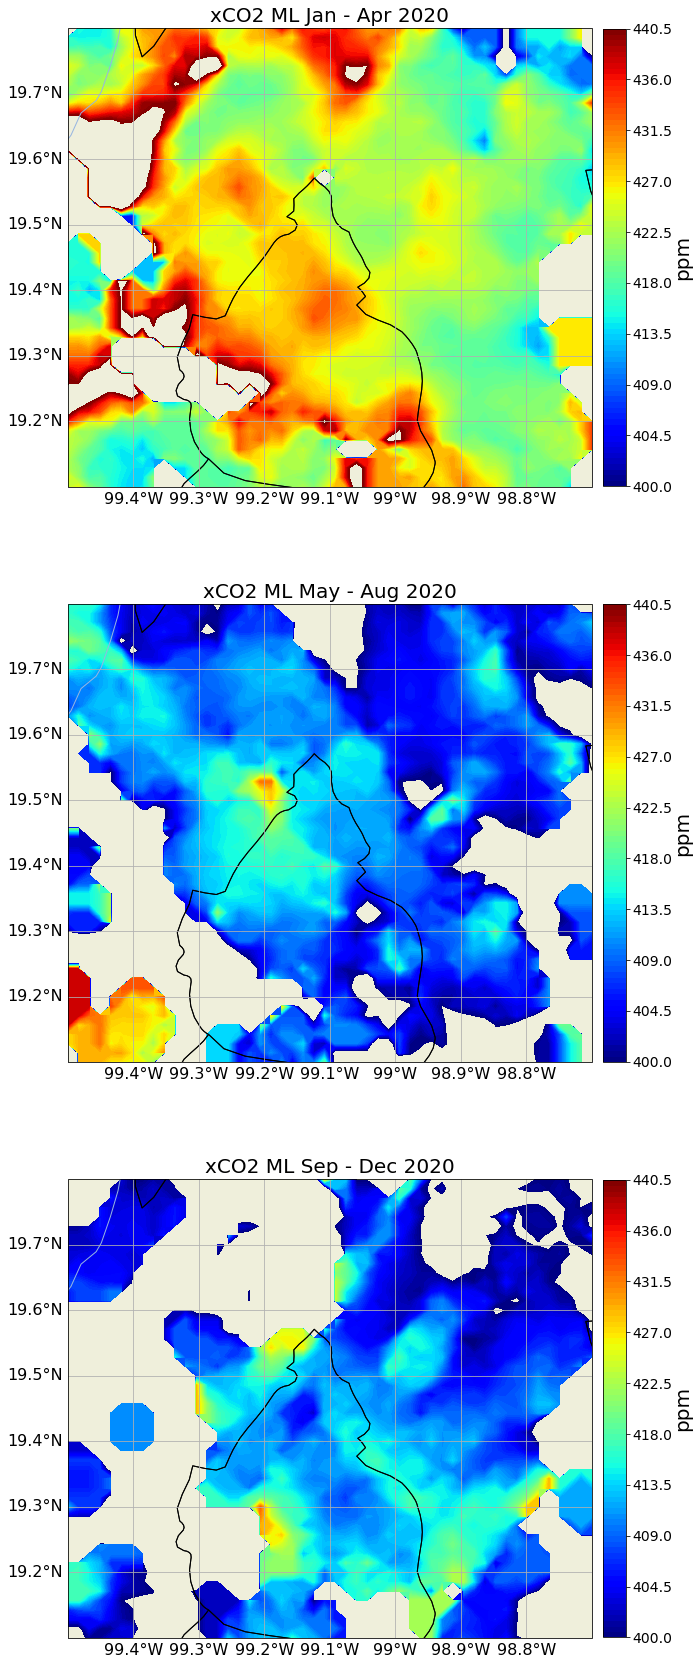

In [47]:
tyr= datemin.strftime("%Y")
if datemin.strftime("%b") == datemax.strftime("%b"):
    tmt= datemin.strftime("%b") + " "
else:
    tmt = datemin.strftime("%b") + ' - ' + datemax.strftime("%b") + " "
tdy=''
mldxco2 = 'P_surf_Avg '
title1 = 'xCO2 ML ' + tmt0 + tdy + tyr
title2 = 'xCO2 ML ' + tmt1 + tdy + tyr
title3 = 'xCO2 ML ' + tmt2 + tdy + tyr
title8 = 'Std Dev ' + tmt + tdy + tyr
title4 = 'Std Dev ' + tmt + tdy + tyr
title7 = 'Std Dev ' + mldxco2 + tmt + tdy + tyr
title5 = 'Std Error ' + tmt + tdy + tyr
title6 = 'Std Error ' + tmt + tdy + tyr
title9 = 'Std Error ' + mldxco2 + tmt + tdy + tyr

lvls1 = np.arange(400,441,.5)
lvls2 = np.arange(400,441,.5)
lvls3 = np.arange(400,441,.5)
lvls8 = np.arange(0,31,1)
lvls4 = np.arange(0,31,1)
lvls7 = np.arange(0,31,1)
lvls5 = np.arange(0,15.5,0.5)
lvls6 = np.arange(0,15.5,0.5)
lvls9 = np.arange(0,15.5,0.5)

titles = [title1,title2,title3,title4,title5,title6,title7,title8,title9]
matrices = [matrixc,matrixc1,matrixc2,stdmatc,errmat1,errmatc,errdiff,mdiff,stddiff]
matricesf = [matrix1f,matrix2f,matrixcf,stdmat1f,stdmat2f,stdmatcf,errmat1f,errmat2f,errmatcf]
lvls = [lvls1,lvls2,lvls3,lvls4,lvls5,lvls6,lvls7,lvls8,lvls9]


# Creates the map
mpf.mappernxm(latmin,latmax,lonmin,lonmax,lons,lats,rows,cols,titles,fontsize,ticksize,lvls,matrices,figname,savefig,cbarname)

In [ ]:
months = np.arange(1,13)
monthmats = []
monthstdmats = []
montherrmats = []
monthtitles = []
monthlvls = []
for ele in months:
    lastday=monthrange(2020,ele)
    datemin = datetime.datetime(2020,ele,1)
    datemax = datetime.datetime(2020,ele,lastday[1],23,59,59)
    tmin=(datemin-to).total_seconds()
    tmax=(datemax-to).total_seconds()
    monthlvl = np.arange(0,25,1)
    monthtitle=''+datemin.strftime("%b")+' 2020'
    monthmat,monthstdmat,montherrmat=mpf.hourlymatrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
    monthmat=np.where(monthmat!=0,monthmat,np.nan)
    monthstdmat=np.where(monthstdmat!=0,monthstdmat,np.nan)
    montherrmat=np.where(montherrmat!=0,montherrmat,np.nan)
    monthmats.append(monthmat)
    monthstdmats.append(monthstdmat)
    montherrmats.append(montherrmat)
    monthtitles.append(monthtitle)
    monthlvls.append(monthlvl)

In [14]:
months = np.arange(1,13)
monthmats = []
monthtitles = []
monthlvls = []
for ele in months:
    lastday=monthrange(2020,ele)
    datemin = datetime.datetime(2020,ele,1)
    datemax = datetime.datetime(2020,ele,lastday[1],23,59,59)
    tmin=(datemin-to).total_seconds()
    tmax=(datemax-to).total_seconds()
    monthlvl = np.arange(0,96,1)
    monthtitle=''+datemin.strftime("%b")+' 2020'
    monthmat=mpf.countermatrixforinterval(tmin,tmax,data,lats,lons,name,footprintradio)
    monthmat=np.where(monthmat!=0,monthmat,np.nan)
    monthmats.append(monthmat)
    monthtitles.append(monthtitle)
    monthlvls.append(monthlvl)

In [15]:
print(countermatrix)

NameError: name 'countermatrix' is not defined

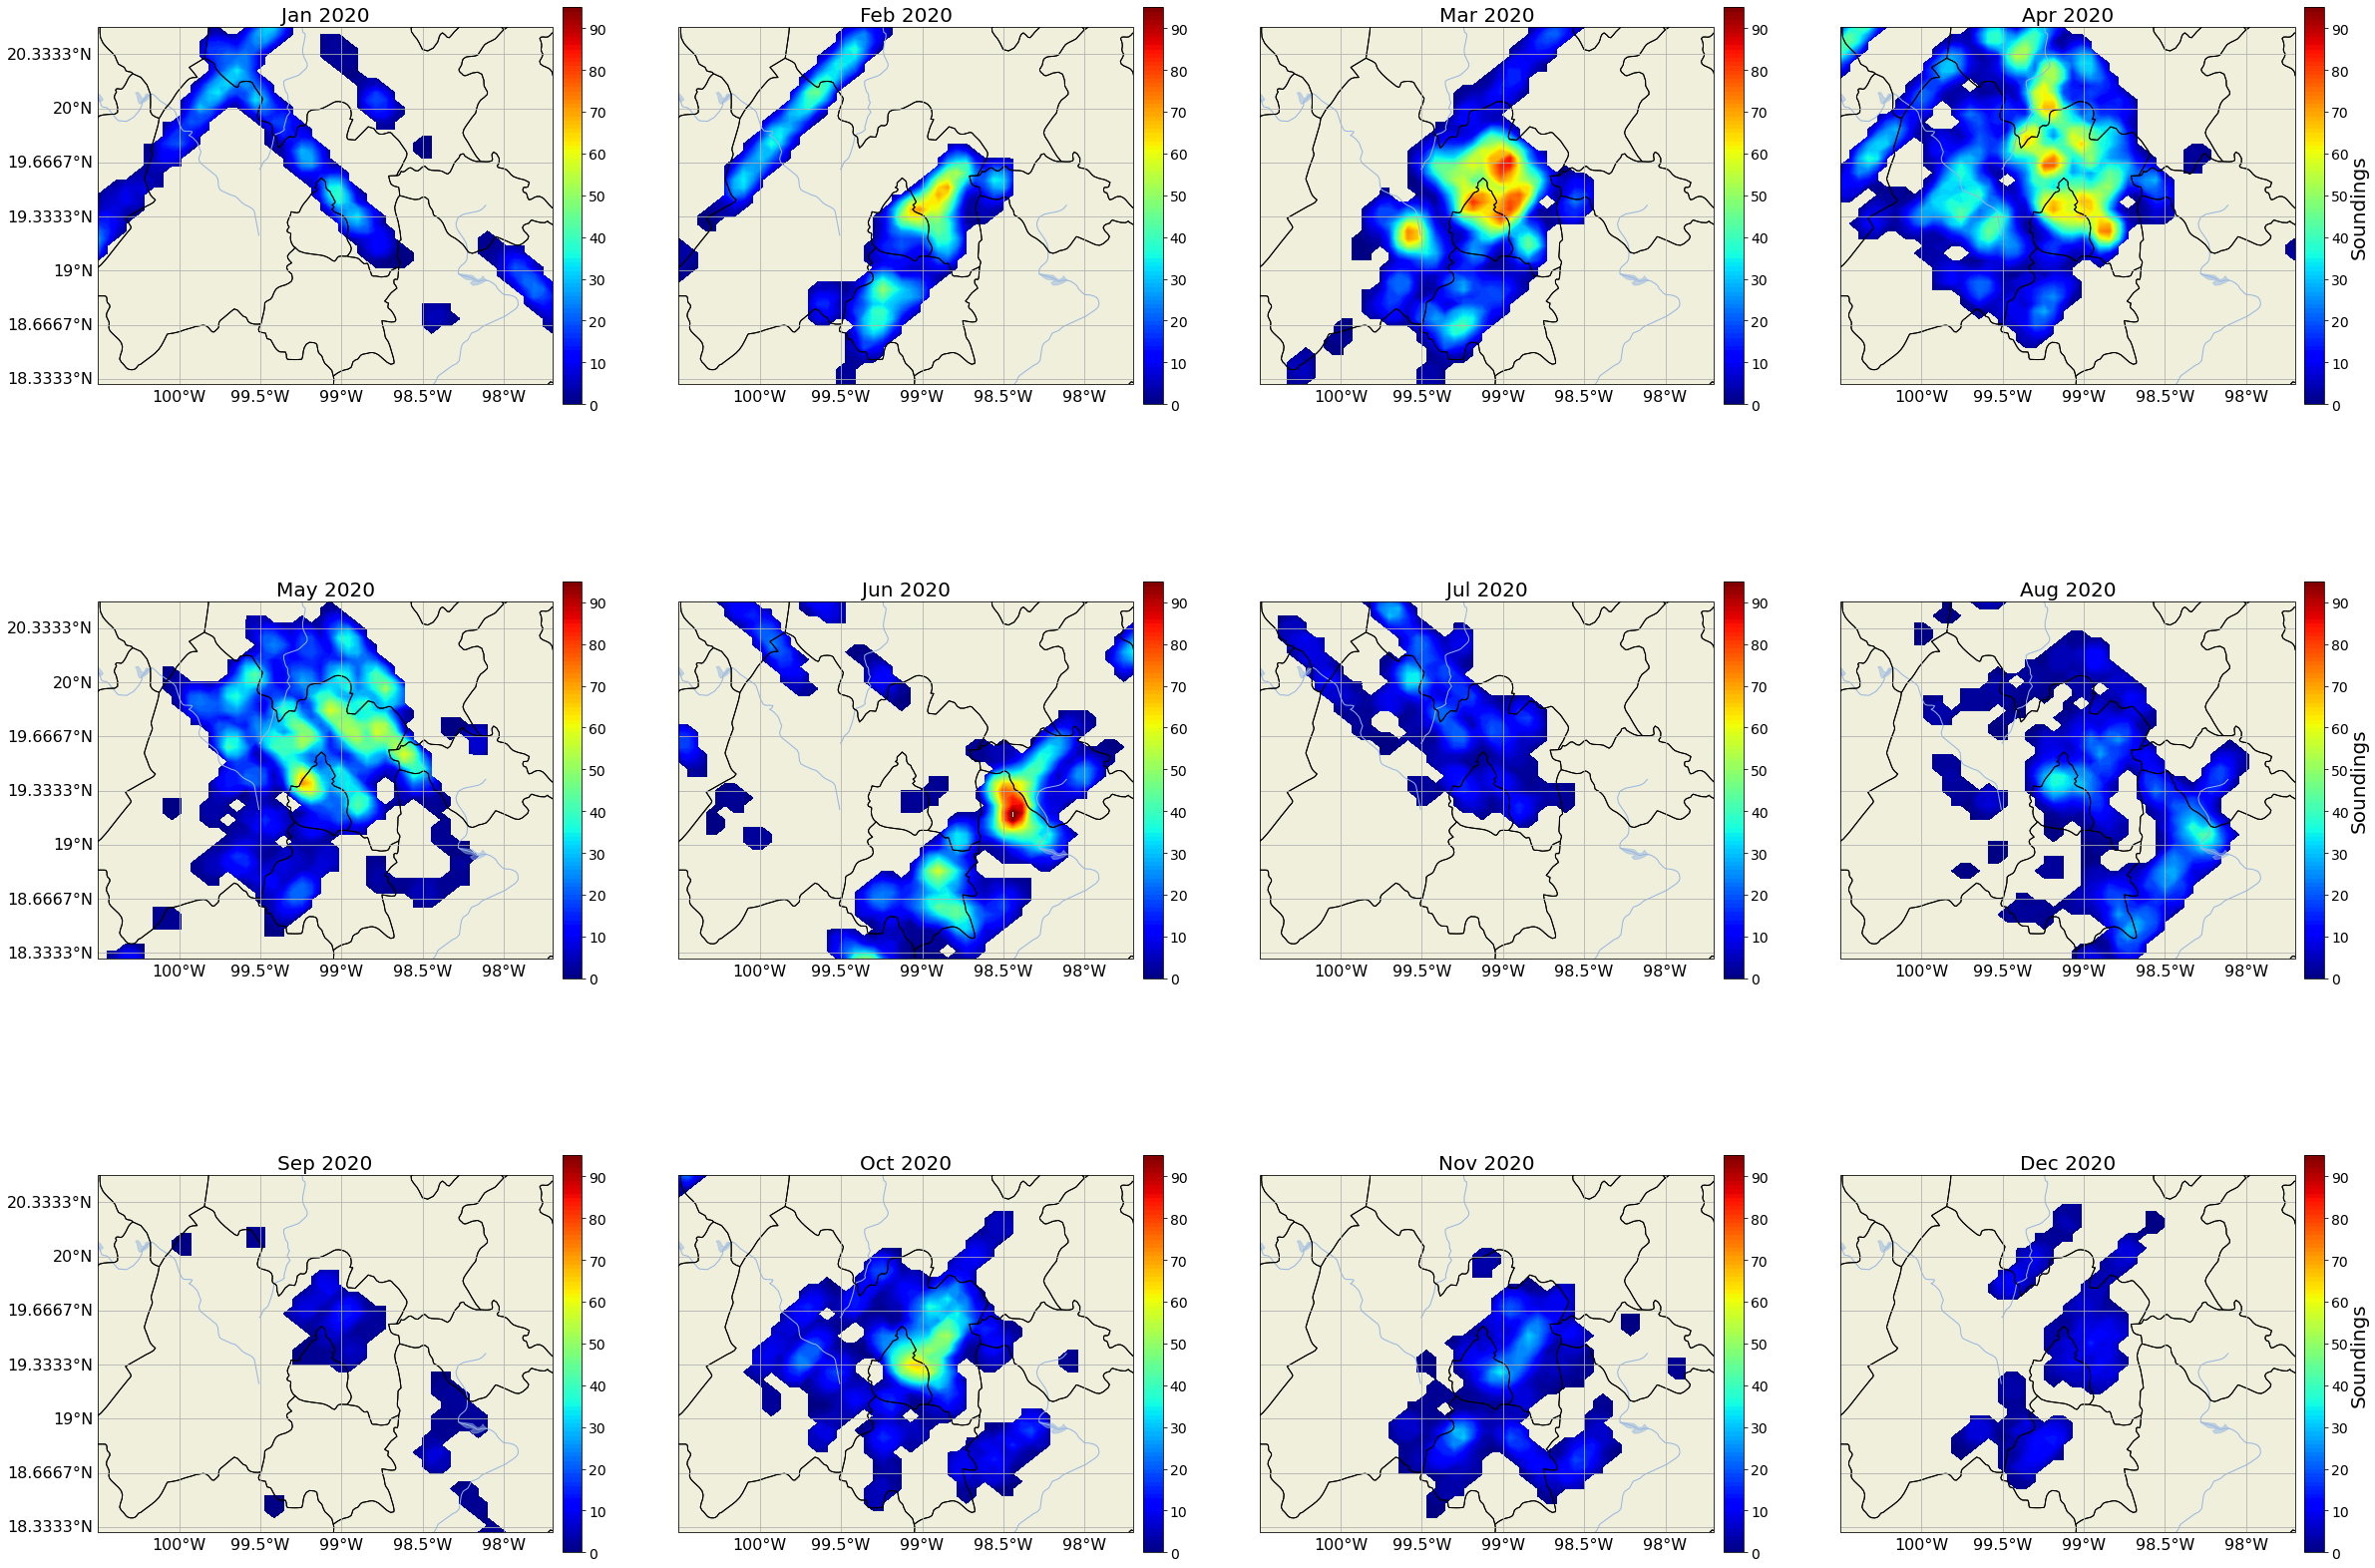

In [16]:
titles = monthtitles
matrices = monthmats
lvls = monthlvls


# Creates the map
mpf.mappernxm(latmin,latmax,lonmin,lonmax,lons,lats,rows,cols,titles,fontsize,ticksize,lvls,matrices,figname,savefig,cbarname)

In [ ]:
##########################################################################################################
#TESTING STARTS HERE

In [ ]:
print(datac.shape,datos.shape)

In [ ]:
np.array_equal(data[name],datac[name])

In [ ]:
print(matrixc)

In [ ]:
dset.close()
mset.close()

In [ ]:
dset2 = np.load('altzrefavg.npz', 'r')
t0 = datetime.datetime.utcfromtimestamp(0.0)
dsetepoch = np.array([(datetime.datetime(year=2020,month=dset2['month'][i],day=dset2['day'][i]) - t0).total_seconds() for i,dum in enumerate(dset2['month'])])

In [ ]:
print(dsetepoch)

In [ ]:
timestamp=copy.copy(data['tepoch'])
timerow1 = datetime.datetime.utcfromtimestamp(timestamp[0])
timerow1ymd = (datetime.datetime(year=timerow1.year,month=timerow1.month,day=timerow1.day) - t0).total_seconds()
if timerow1ymd in dsetepoch:
    print(timerow1.strftime("%b/%d-%H:%M")," match")
else:
    print(timerow1.strftime("%b/%d-%H:%M")," no match")
for i,ele in enumerate(timestamp):
    timerow2 = datetime.datetime.utcfromtimestamp(ele)
    timerow2ymd = (datetime.datetime(year=timerow2.year,month=timerow2.month,day=timerow2.day) - t0).total_seconds()
    if (timerow2.strftime("%b") == timerow1.strftime("%b")) & (timerow2.strftime("%d") == timerow1.strftime("%d")):
        pass
    else:
        if timerow2ymd in dsetepoch:
            print(timerow2.strftime("%b/%d-%H:%M")," match")
        else:
            print(timerow2.strftime("%b/%d-%H:%M")," no match")
    timerow1 = timerow2

In [ ]:
dset2.close()

In [ ]:
timestamp=copy.copy(data['tepoch'])
t0 = datetime.datetime.utcfromtimestamp(0.0)
timerow = datetime.datetime.utcfromtimestamp(timestamp[0])
timerowymd = (datetime.datetime(year=timerow.year,month=timerow.month,day=timerow.day) - t0).total_seconds()
daylist = [timerowymd,timerow.year,timerow.month,timerow.day]
print(daylist)
for i,ele in enumerate(timestamp):
    timerow = datetime.datetime.utcfromtimestamp(ele)
    timerowymd = (datetime.datetime(year=timerow.year,month=timerow.month,day=timerow.day) - t0).total_seconds()
    daylist_inter = [timerowymd,timerow.year,timerow.month,timerow.day]
    if timerowymd not in daylist:
        print(daylist_inter)
        daylist = np.vstack((daylist,daylist_inter))
    

In [ ]:
print(daylist.shape,daylist)

In [ ]:
tepoch = daylist[:,0].astype(int)
year = daylist[:,1].astype(int)
month = daylist[:,2].astype(int)
day = daylist[:,3].astype(int)
np.savez('targetdatadays',tepoch=tepoch,year=year,month=month,day=day)

In [ ]:
daset = np.load('targetdatadays.npz', 'r')
m = daset['tepoch']
for i, ele in enumerate(m):
    datarow = daset['tepoch'][i],daset['year'][i],daset['month'][i],daset['day'][i]
    print(datarow)

In [ ]:
daset.close()